# Занятие 2
# Прикладная алгебра и численные методы
## Метод наименьших квадратов, линейная регрессия
numpy:
https://numpy.org/doc/stable/reference/routines.linalg.html

scipy:
https://docs.scipy.org/doc/scipy/reference/linalg.html

In [11]:
import numpy as np
import pandas as pd
import scipy.linalg
import sympy
import matplotlib.pyplot as plt
from sympy import latex, Matrix
from IPython.display import display, Latex

## Задача 1 метод наименьших квадратов
$$
\left\{
\begin{matrix}
x - 5y = 4\\
-2x + 10y = -7
\end{matrix}
\right.
$$
Проверить СЛАУ на совместность.
Решить СЛАУ с помощью МНК.
Построить графики прямых, соответствующих уравнениям системы, отметить маркером псевдорешение.
Построить  график зависимости невязки от координат $x$ и $y$ вектора в диапазоне (-2, 0).
Отметить маркером на графике точку, соответствующую псевдорешению.
Найти минимальное значение невязки для координат  $x$ и $y$ вектора в диапазоне $x\in (-0.5, 0.5)$ $y\in (-1.5, 0.0)$, сравнить с невязкой псевдорешения.

Вначале построим графики прямых, соответствующих уравнениям системы:

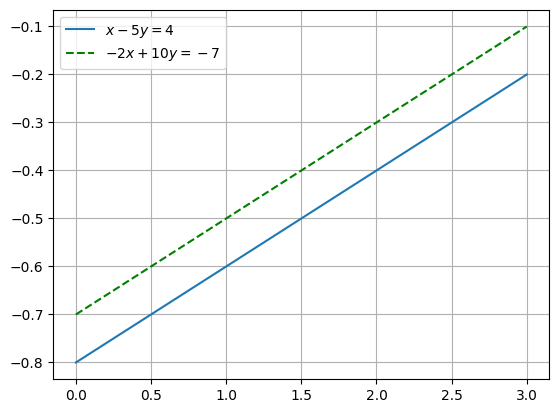

In [12]:
b = np.array([4, -7])
a = np.array([1, -2])
c = np.array([-5, 10])
A = np.transpose(np.stack((a, c)))
x = np.linspace(0, 3, 100)
y_1, y_2 = [(b[i]-x*a[i])/c[i] for i in range(len(a))]

plt.plot(x, y_1)
plt.plot(x, y_2, 'g--')
plt.legend(('$x - 5 y = 4$', '$-2x+10y = -7$'))
plt.grid(True)
plt.show()

Прямые параллельны, поскольку коэффициенты при переменных пропорциональны, проверим это:

In [13]:
np.allclose(((y_1-y_1[0])/x)[10:], ((y_2-y_2[0])/x)[10:], atol = 10e-3)

C:\Users\Mat\AppData\Local\Temp\ipykernel_10352\2064526306.py:1: RuntimeWarning: invalid value encountered in divide
  np.allclose(((y_1-y_1[0])/x)[10:], ((y_2-y_2[0])/x)[10:], atol = 10e-3)


True

Найдем псевдорешение с помощью псевдообратной матрицы:

In [45]:
solution = np.linalg.pinv(A) @ b
print(solution)
display(Latex(f"Pseudosolition ${latex(Matrix(solution))}$"))

[[ 0.13846154]
 [-0.69230769]]


<IPython.core.display.Latex object>

Отметим на графике точку, соответствующую псевдорешению:

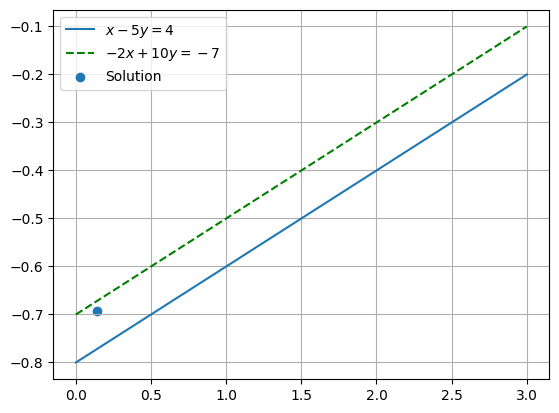

In [15]:
plt.plot(x, y_1)
plt.plot(x, y_2, 'g--')
plt.scatter(*solution)
plt.legend(('$x - 5 y = 4$', '$-2x+10y = -7$','Solution' ))
plt.grid(True)

Опишем функцию residual(A, b, sol), вычисляющую норму невязки (длину).

In [16]:
def residual(A, b, sol):
    return np.linalg.norm(A @ sol - b)

Построим график зависимости невязки от координат $x$ и $y$ вектора в диапазоне (-2, 0):

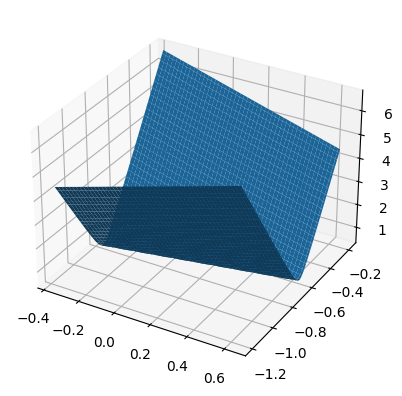

In [24]:
delta = 0.5
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
b = np.array([[4], [-7]])
x, y = np.meshgrid(np.linspace(0.1384 - delta, 0.1384 + delta, 100), np.linspace(-0.692 - delta, -0.692 + delta, 100))
Z = np.array([[residual(A, b, np.array([[x[i, j]], [y[i, j]]])) for j in range(100)] for i in range(100)])
ax.plot_surface(x, y, Z)

Отметим маркером на графике точку, соответствующую псевдорешению:

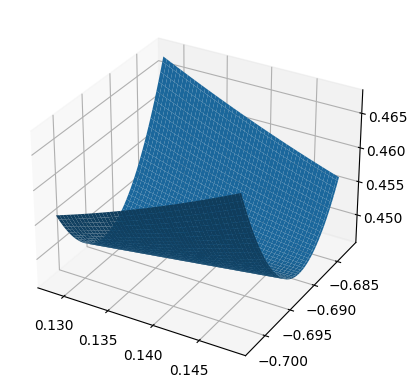

In [52]:
delta = 0.01
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
b = np.array([[4], [-7]])
x, y = np.meshgrid(np.linspace(solution[0] - delta, solution[0] + delta, 100), np.linspace(solution[1] - delta, solution[1] + delta, 100))
Z = np.array([[residual(A, b, np.array([[x[i, j]],  [y[i, j]]])) for j in range(100)] for i in range(100)])
ax.scatter(*solution, residual(A, b, solution),c ="k",  marker = (6, 2))
ax.plot_surface(x, y, Z)

По графику неясно, что в точке, соответствующей псевдорешению, невязка имеет минимум.
Найдем минимальное значение невязки для координат  $x$ и $y$ вектора в диапазоне $x\in (-0.5, 0.5)$ $y\in (-1.5, 0.0)$:

In [55]:
print(np.min(Z) ==  residual(A, b, solution))

True


### Задача 2
$$
\left\{
\begin{matrix}
2x + 3y - z = 5\\
3x - 2y + z = 2\\
5x + y = 0
\end{matrix}
\right.
$$
Проверить СЛАУ на совместность.
Решить СЛАУ с помощью МНК.
Найдти минимальное значение невязки для координат  $x$ и $y$ вектора в диапазоне (-1, 1), сравнить с невязкой псевдорешения.

Проверим на совместность:

Найдем псевдорешение с помощью псевдообратной матрицы:

Найдем минимальное значение невязки для координат  $x$, $y$ и $z$ вектора в диапазоне (-1, 1):

## Задача 3 линейная регрессия
Считать данные из файла sem2_corona2020.xlsx.

Найти:

a) коэффициенты $k_2$ и $b$ линейной регрессии $Q_1 = k_2X_2+b$, если $x_2$ представляет собой столбец 2, $Q_1$ - столбец 1;

b) коэффициенты $k_3$ и $k_4$ линейной регрессии $Q_1 = k_3X_3+k_4X_4$, если $X_i$ представляет собой столбец $i$, $Q_1$ - столбец 1;

c) коэффициенты $k_2$, $k_5$ и $t$ линейной регрессии $Q_4 = k_2X_2+k_5X_5 + t$, если $X_i$ представляет собой столбец $i$, $Q_4$ - столбец 4.

Построить график регрессии для a), отметить на них маркерами данные.

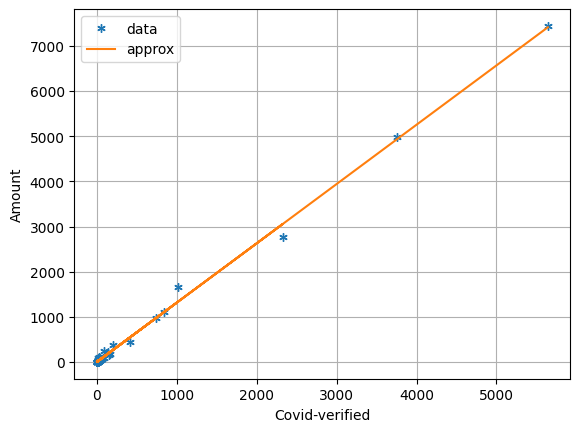

In [95]:
data = pd.read_csv("sem2_corona2020.csv",encoding = "cp1252",sep=';')
data = data.iloc[: , 1:]
Q, x_2 = data["1"].to_numpy(), data["2"].to_numpy()
b_ = np.zeros(len(Q)) + 1
A = np.transpose(np.stack((x_2, b_)))
A_ = np.linalg.pinv(A)
k_2, b = A_ @ Q


plt.plot(x_2, Q, ' ', marker = (6, 2), label = "data")
plt.plot(x_2, k_2*x_2 + b_*b, label = "approx")
plt.xlabel("Covid-verified")
plt.legend()
plt.ylabel("Amount")
plt.grid(True)

Text(0.5, 0, '$Q$')

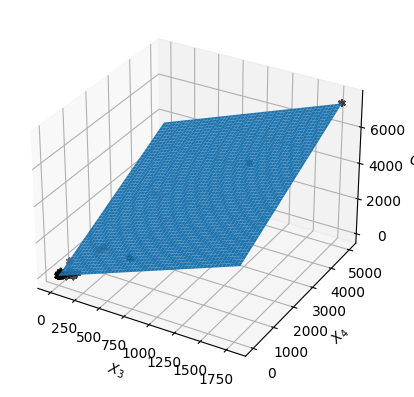

In [105]:
data = pd.read_csv("sem2_corona2020.csv",encoding = "cp1252",sep=';')
data = data.iloc[: , 1:]
Q, x_3, x_4 = data["1"].to_numpy(), data["3"].to_numpy(), data["4"].to_numpy()
A = np.transpose(np.stack((x_3, x_4)))
A_ = np.linalg.pinv(A)
k_3, k_4 = A_ @ Q

ax = plt.subplot(projection = '3d')
X_3, X_4 = np.meshgrid(np.linspace(np.min(x_3) - 1, np.max(x_3) + 1, 500), np.linspace(np.min(x_4) + 1, np.max(x_4) + 1, 500))

ax.plot_surface(X_3, X_4, X_3*k_3 + X_4*k_4, label = 'approx' )
ax.scatter(x_3, x_4, Q,c ="k",  marker = (6, 2), label = 'Data')
ax.set_xlabel('$X_3$')
ax.set_ylabel('$X_4$')
ax.set_zlabel('$Q$')

## Задача 4* линейная регрессия
Для а) Задачи 3 исключить из рассмотрения данные, в которых $x_i> 1000$, $q_i>1000$,
построить на одном графике новую и старую линии регрессии, отметить маркерами все данные, кроме исключенных, зеленым цветом, исключенные данные красным.